<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/crypto_markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np
import pandas as pd
import datetime as dt

 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [143]:
data = pd.read_csv('crypto-markets.csv', parse_dates=['date'],index_col='date')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659373 entries, 2013-04-28 to 2018-01-10
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         659373 non-null  object 
 1   symbol       659373 non-null  object 
 2   name         659373 non-null  object 
 3   ranknow      659373 non-null  int64  
 4   open         659373 non-null  float64
 5   high         659373 non-null  float64
 6   low          659373 non-null  float64
 7   close        659373 non-null  float64
 8   volume       659373 non-null  int64  
 9   market       659373 non-null  int64  
 10  close_ratio  644847 non-null  float64
 11  spread       659373 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 65.4+ MB


,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [150]:
name = data['name'].unique()
print(name)

['Bitcoin' 'Ethereum' 'Ripple' 'Bitcoin Cash' 'Litecoin' 'Monero' 'Zcash']


In [151]:
#Open The price of the coin at the beginning of the trading day.

#High: The highest price of the coin on a trading day.

#Low: The lowest price of the coin on a trading day.

#Close: The last price of the coin before the trading day ends.

In [152]:
data = data[data.symbol.isin(['BTC', 'LTC', 'ETH', 'ZEC', 'XRP', 'XMR', 'BCH'])]


In [153]:
data.name.value_counts()

Bitcoin         1719
Litecoin        1719
Ripple          1621
Monero          1330
Ethereum         888
Zcash            439
Bitcoin Cash     172
Name: name, dtype: int64

In [154]:
print(data.isnull().sum())

slug           0
symbol         0
name           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    2
spread         0
dtype: int64


In [155]:
print(data.duplicated().sum())

0


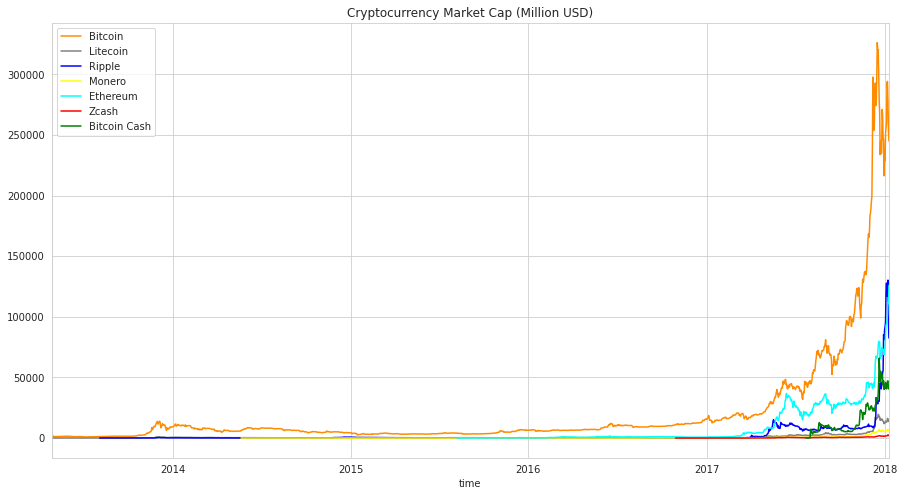

In [156]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']
plt.figure(figsize=(15,8))
(bitcoin['market']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['market']/1000000).plot(color='grey', label='Litecoin')
(ripple['market']/1000000).plot(color='blue', label='Ripple')
(monero['market']/1000000).plot(color='yellow', label='Monero')
(ethereum['market']/1000000).plot(color='cyan', label='Ethereum')
(zcash['market']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['market']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

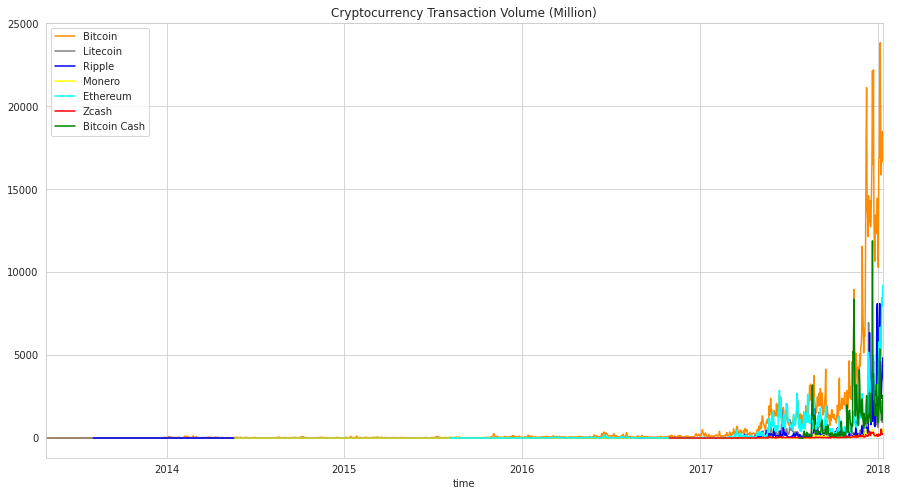

In [157]:
# plot transaction volume
plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['volume']/1000000).plot(color='blue', label='Ripple')
(monero['volume']/1000000).plot(color='yellow', label='Monero')
(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')
(zcash['volume']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['volume']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million)')
plt.show()

In [64]:
#As we can see from both market capitalization and transaction volume plots, nothing really happened before 2017 (Only Bitcoin had some transactions), 2017 was seemingly a breakthrough year for the cryptocurrency ecosystem.
#Also we find:

#As the transaction volume of BitCoin increased, the volume of the other cryptocurrencies also increased.
#As the price of BitCoin increased, the price of the other cryptocurrencies also increased.
#It seems like BitCoin is leading the market changes.

In [158]:
data_m = data['2017-12-01':'2017-12-31']

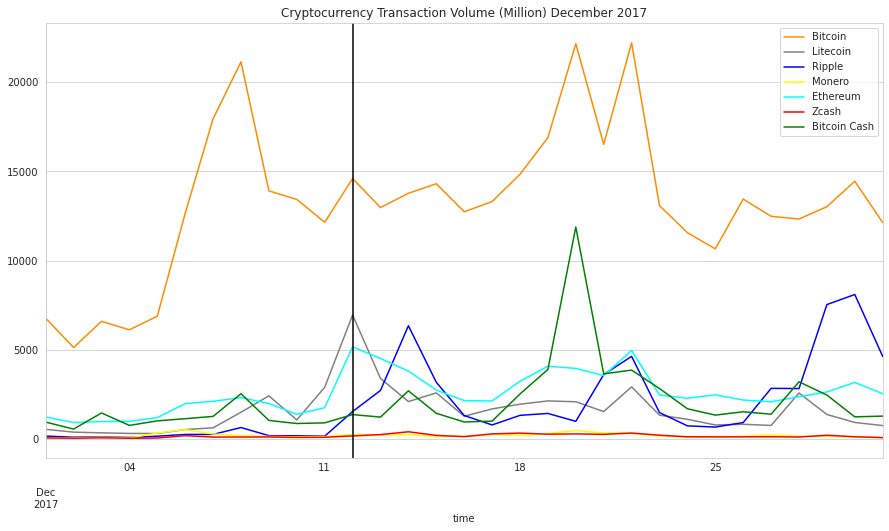

In [36]:
bitcoin = data_m[data_m['symbol']=='BTC']
litecoin = data_m[data_m['symbol']=='LTC']
ripple = data_m[data_m['symbol']=='XRP']
monero = data_m[data_m['symbol']=='XMR']
ethereum = data_m[data_m['symbol']=='ETH']
zcash = data_m[data_m['symbol']=='ZEC']
bitcoin_cash = data_m[data_m['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['volume']/1000000).plot(color='blue', label='Ripple')
(monero['volume']/1000000).plot(color='yellow', label='Monero')
(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')
(zcash['volume']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['volume']/1000000).plot(color='green', label='Bitcoin Cash')
plt.axvline(dt.datetime(2017, 12, 12),color='black')
plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million) December 2017')
plt.show()

In [66]:
#As we take a closer look at one-month data for trasaction volume in December 2017 , 
#we can clearly see that when the volume of BitCoin increased and peaked on around 12/7,
#other cryptocurrencies started to increase and peak a few days later.
#In order to keep our analysis more accurate with current trend, we will be focusing on year 2017 and 2018.

In [67]:
data = data['2017-01-01':]
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68


In [68]:
#Price Fluctuation of Cryptocurrencies
#Check opening, closing, highest, and lowest price for each of the cryptocurrency.

In [69]:
data['oc_diff']=data['close']-data['open']
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,oc_diff
date,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,34.67
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,23.13
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,22.24
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,110.33
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,-143.35


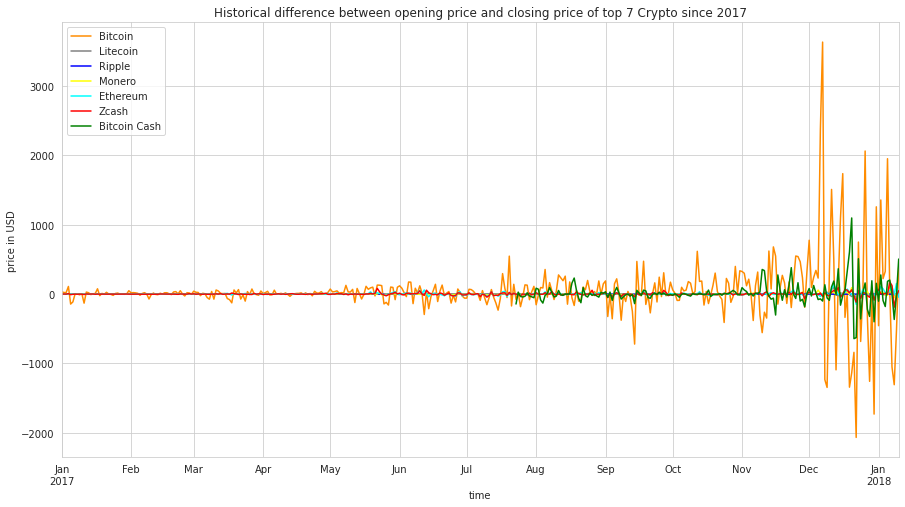

In [39]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['oc_diff']).plot(color='darkorange', label='Bitcoin')
(litecoin['oc_diff']).plot(color='grey', label='Litecoin')
(ripple['oc_diff']).plot(color='blue', label='Ripple')
(monero['oc_diff']).plot(color='yellow', label='Monero')
(ethereum['oc_diff']).plot(color='cyan', label='Ethereum')
(zcash['oc_diff']).plot(color='red', label='Zcash')
(bitcoin_cash['oc_diff']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 7 Crypto since 2017')
plt.legend()
plt.show()

In [70]:
#By plotting the difference between daily opening and closing price, we found that:

#Daily opening price and closing price of BitCoin and BitCoin Cash varies the most, the differences can range from 1000 to more than 3000 dollars.
#The rest of the cryptocurrencies that we selected tends to be fairly stable

In [71]:
# Average difference for each cryptocurrency
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ripple':[(ripple['oc_diff']).mean()],
          'monero':[(monero['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()],
          'zcash':[(zcash['oc_diff']).mean()],
          'bitcoin_cash':[(bitcoin_cash['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

,bitcoin,litecoin,ripple,monero,ethereum,zcash,bitcoin_cash
avg.diff,37.035253,0.62344,0.005311,0.95824,3.268667,1.89872,12.653779


In [72]:
#To get a better understanding of difference between daily opening and closing price, we calculated the average difference
 #as well as daily price spread for each cryptocurrency. Clearly, it also indicates BitCoin and BitCoin Cash varies the most.

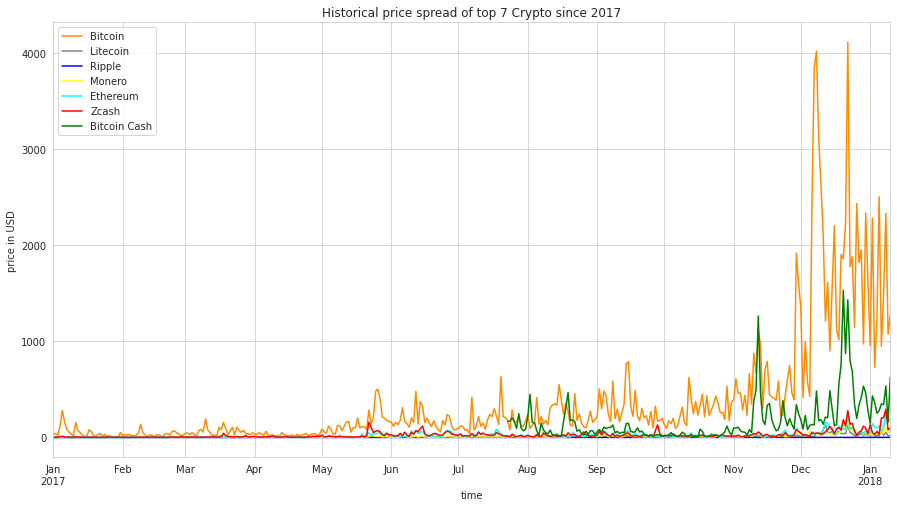

In [73]:
# Differences of daily highest price and lowest price
plt.figure(figsize=(15,8))
(bitcoin['spread']).plot(color='darkorange', label='Bitcoin')
(litecoin['spread']).plot(color='grey', label='Litecoin')
(ripple['spread']).plot(color='blue', label='Ripple')
(monero['spread']).plot(color='yellow', label='Monero')
(ethereum['spread']).plot(color='cyan', label='Ethereum')
(zcash['spread']).plot(color='red', label='Zcash')
(bitcoin_cash['spread']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical price spread of top 7 Crypto since 2017')
plt.legend()
plt.show()

In [74]:
#By plotting the spread (difference) between daily highest and lowest price, we found that:

#Daily price of BitCoin and BitCoin Cash varies the most
#Zcash and Ethereum varies slightly
#The rest of the cryptocurrencies that we selected tends to be fairly stable

In [42]:
# Average spread for each cryptocurrency
ave_spread={'bitcoin':[(bitcoin['spread']).mean()],
          'litecoin':[(litecoin['spread']).mean()],
          'ripple':[(ripple['spread']).mean()],
          'monero':[(monero['spread']).mean()],
          'ethereum':[(ethereum['spread']).mean()],
          'zcash':[(zcash['spread']).mean()],
          'bitcoin_cash':[(bitcoin_cash['spread']).mean()]}
pd.DataFrame(ave_spread, index=['avg.spread'])

,bitcoin,litecoin,ripple,monero,ethereum,zcash,bitcoin_cash
avg.spread,363.598107,6.672827,0.04536,10.33224,23.254747,25.736507,176.115116


In [76]:
#Although average of difference (closing - opening price) for BitCoin is only around 37 dollars
#the average daily spread is 363 dollars. It must be hard and nervous to watch the price flucuate that much.

In [100]:
btc = bitcoin[['close']]
btc.columns = ['BTC']
print(btc.head(10))
btc_ma=btc.rolling(window=5).mean()
print(btc_ma.head(10))
ltc = litecoin[['close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = ripple[['close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

xmr = monero[['close']]
xmr.columns = ['XMR']
xmr_ma=xmr.rolling(window=5).mean()

eth = ethereum[['close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()

zec = zcash[['close']]
zec.columns = ['ZEC']
zec_ma=zec.rolling(window=5).mean()

bch = bitcoin_cash[['close']]
bch.columns = ['BCH']
bch_ma=bch.rolling(window=5).mean()

# create matrix of close price only for later use
close = pd.concat([btc,ltc,xrp,xmr,eth,zec,bch], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,xrp_ma,xmr_ma,eth_ma,zec_ma,bch_ma], axis=1)
close_ma.tail()

                BTC
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38
2017-01-06   902.20
2017-01-07   908.59
2017-01-08   911.20
2017-01-09   902.83
2017-01-10   907.68
                 BTC
date                
2017-01-01       NaN
2017-01-02       NaN
2017-01-03       NaN
2017-01-04       NaN
2017-01-05  1046.406
2017-01-06  1027.180
2017-01-07  1004.548
2017-01-08   978.020
2017-01-09   927.640
2017-01-10   906.500


,BTC,LTC,XRP,XMR,ETH,ZEC,BCH
date,,,,,,,
2018-01-06,16147.76,257.628,2.986,407.248,973.496,622.742,2624.200
2018-01-07,16446.86,264.182,3.166,422.430,1027.242,682.192,2639.376
2018-01-08,16440.68,266.260,3.036,421.032,1064.404,704.912,2601.932
2018-01-09,16239.92,267.394,2.816,423.088,1128.168,720.430,2594.208
2018-01-10,15748.68,267.644,2.600,427.648,1179.788,746.938,2656.388


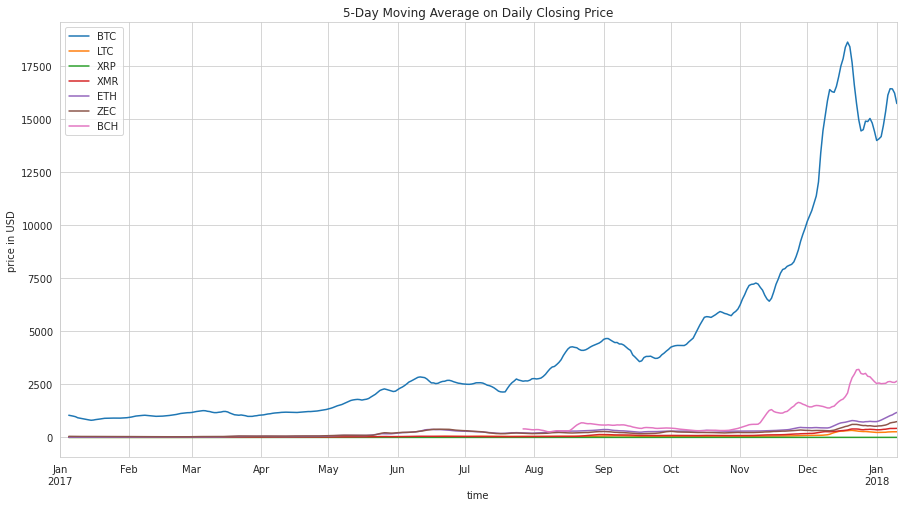

In [103]:
# plot moving average for closing price for cryptocurrencies
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

In [104]:
#Based on the 5-day moving average plot:

#Prices of BitCoin and BitCoin Cash fluctuate a little more than the rest of cryptocurrencies
#Staring from January 2018, it seems like the prive of BitCoin had significantly dropped but has started to climb back around February. 
#However, it's hard to say if BitCoin is going back to its peak in 2017.

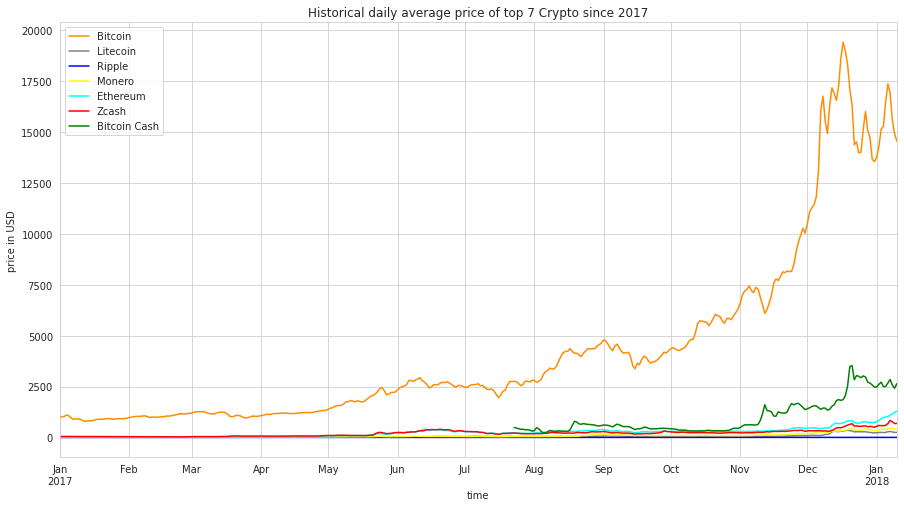

In [85]:
# calculate daily average price
data['daily_avg'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')
(ripple['daily_avg']).plot(color='blue', label='Ripple')
(monero['daily_avg']).plot(color='yellow', label='Monero')
(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')
(zcash['daily_avg']).plot(color='red', label='Zcash')
(bitcoin_cash['daily_avg']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of top 7 Crypto since 2017')
plt.legend()
plt.show()

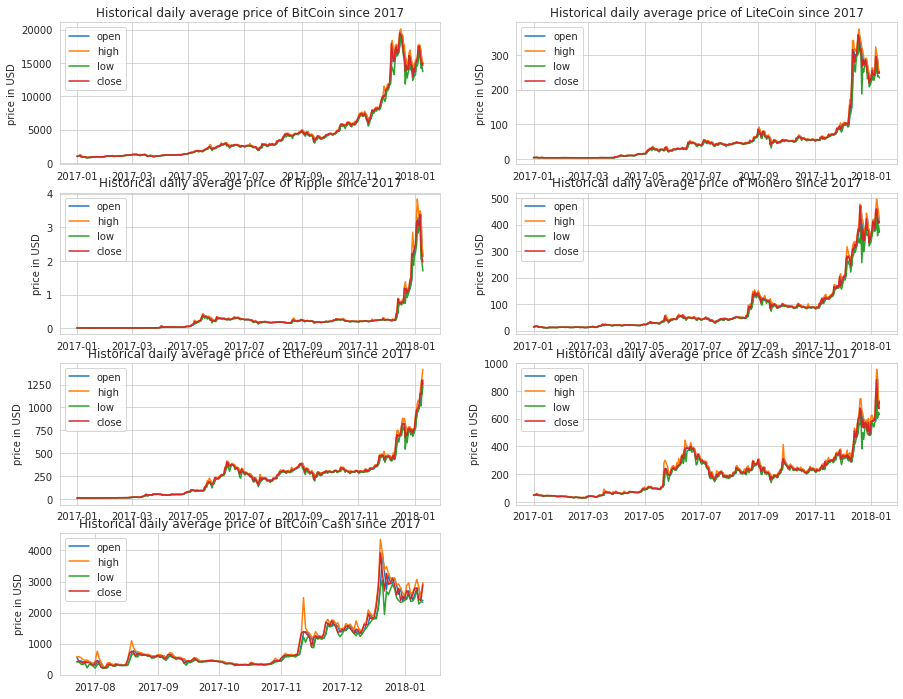

In [86]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(ripple[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ripple since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(monero[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Monero since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])
plt.subplot(4,2,6)
plt.plot(zcash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Zcash since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,7)
plt.plot(bitcoin_cash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin Cash since 2017')
plt.legend(['open','high','low','close'])

plt.show()

In [87]:
#A lot of the above plots doesn't show much differences between different prices,
# but as we previously discovered from transaction volume and average price change, 
#one very obvious pattern is that as the price or volume of Bitcoin increased, the price 
 #and volume of the other cryptocurrencies also increased. 
# It's probably because the success of Bitcoin paves the way for cryptocurrency ecosystems and attracted more and more investors.
# Also, the high buying price of Bitcoin might triggers buys for its cheaper alternatives.

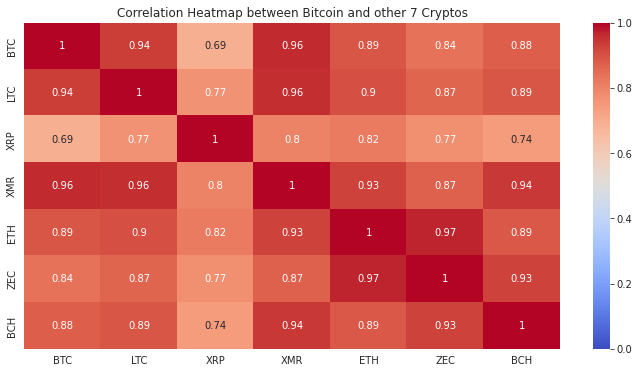

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 7 Cryptos')
plt.show()

In [ ]:
#Based on the heatmap as well as some of the previous plots, we can say that Bitcoin price does have strong impact to other cryptocurrencies.

#As the transaction volume of BitCoin increased, the volume of the other cryptocurrencies also increased.
#As the price of BitCoin increased, the price of the other cryptocurrencies also increased.
#It seems like BitCoin is leading the market changes.
#Prices of other cryptocurrency have strong positive correaltion with price of BitCoin

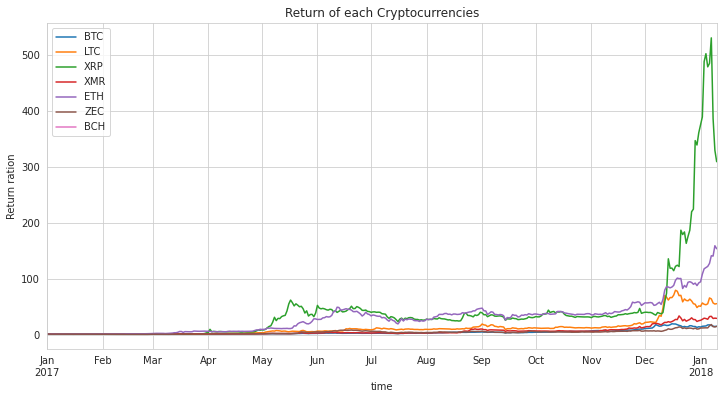

In [105]:
#return ratio = current value of the cryptocurrency / initial value of the cryptocurrency
returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()

In [106]:
#It looks like since 2017, Ripple (XRP) and Ethereum (ETH) have the highest return ratio, while the rest of cryptocurrencies remains fairly stable.

#Investing in Ripple and Ethereum might get better returns but since 2018, the trend is downward.
#Investing in popular cryptocurrencies like BitCoin and LiteCoin might still worth a try since their price is fairly stable and there seems to be 
#an upward trend.

In [107]:
# droping 'slug' and 'name' as we can just use 'symbol', and droping 'ranknow'.
data=data.drop(['slug', 'name', 'ranknow'], axis=1)


In [ ]:
# Bitcoin (BTC)
BTC = data[data.symbol == 'BTC'].copy()
BTC['daily_avg_After_Month']=BTC['daily_avg'].shift(-30)

X_BTC = BTC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_BTC = BTC.dropna()['daily_avg_After_Month']

X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
X_forecast_BTC =  BTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)


In [121]:
# Ethereum (ETH)
ETH = data[data.symbol == 'ETH'].copy()
ETH['daily_avg_After_Month']=ETH['daily_avg'].shift(-30)
X_ETH = ETH.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_ETH = ETH.dropna()['daily_avg_After_Month']
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2, random_state=43)
X_forecast_ETH =  ETH.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Litecoin (LTC)
LTC = data[data.symbol == 'LTC'].copy()
LTC['daily_avg_After_Month']=LTC['daily_avg'].shift(-30)
X_LTC = LTC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_LTC = LTC.dropna()['daily_avg_After_Month']
X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC = train_test_split(X_LTC, y_LTC, test_size=0.2, random_state=43)
X_forecast_LTC =  LTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Bitcoin Cash (BCH)
BCH = data[data.symbol == 'BCH'].copy()
BCH['daily_avg_After_Month']=BCH['daily_avg'].shift(-30)
X_BCH = BCH.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_BCH = BCH.dropna()['daily_avg_After_Month']
X_train_BCH, X_test_BCH, y_train_BCH, y_test_BCH = train_test_split(X_BCH, y_BCH, test_size=0.2, random_state=43)
X_forecast_BCH =  BCH.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Ripple (XRP)
XRP = data[data.symbol == 'XRP'].copy()
XRP['daily_avg_After_Month']=XRP['daily_avg'].shift(-30)
X_XRP = XRP.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_XRP = XRP.dropna()['daily_avg_After_Month']
X_train_XRP, X_test_XRP, y_train_XRP, y_test_XRP = train_test_split(X_XRP, y_XRP, test_size=0.2, random_state=43)
X_forecast_XRP =  XRP.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)


In [122]:
# Monero (XMR)
XMR = data[data.symbol == 'XMR'].copy()
XMR['daily_avg_After_Month']=XMR['daily_avg'].shift(-30)
X_XMR = XMR.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_XMR = XMR.dropna()['daily_avg_After_Month']
X_train_XMR, X_test_XMR, y_train_XMR, y_test_XMR = train_test_split(X_XMR, y_XMR, test_size=0.2, random_state=43)
X_forecast_XMR =  XMR.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Zcash (ZEC)
ZEC = data[data.symbol == 'ZEC'].copy()
ZEC['daily_avg_After_Month']=ZEC['daily_avg'].shift(-30)
X_ZEC = ZEC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_ZEC = ZEC.dropna()['daily_avg_After_Month']
X_train_ZEC, X_test_ZEC, y_train_ZEC, y_test_ZEC = train_test_split(X_ZEC, y_ZEC, test_size=0.2, random_state=43)
X_forecast_ZEC =  ZEC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

In [159]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        
        
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

In [124]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin (BTC):
Random Forest Regressor
R2: 0.96
MAE: 560.55
MSE: 639991.22

ExtraTrees Regressor
R2: 0.96
MAE: 538.34
MSE: 589971.73



In [125]:
# Ethereum (ETH)
print('Ethereum (ETH):')
regression(X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH)

Ethereum (ETH):
Random Forest Regressor
R2: 0.77
MAE: 57.71
MSE: 7741.72

ExtraTrees Regressor
R2: 0.74
MAE: 57.74
MSE: 8569.54



In [126]:
# Litecoin (LTC)
print('Litecoin (LTC):')
regression(X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC)

Litecoin (LTC):
Random Forest Regressor
R2: 0.69
MAE: 17.42
MSE: 1223.62

ExtraTrees Regressor
R2: 0.74
MAE: 17.04
MSE: 1035.01



In [127]:
# Bitcoin Cash (BCH)
print('Bitcoin Cash (BCH):')
regression(X_train_BCH, X_test_BCH, y_train_BCH, y_test_BCH)

Bitcoin Cash (BCH):
Random Forest Regressor
R2: 0.80
MAE: 308.58
MSE: 195338.45

ExtraTrees Regressor
R2: 0.82
MAE: 290.44
MSE: 173408.00



In [128]:
# Ripple (XRP)
print('Ripple (XRP):')
regression(X_train_XRP, X_test_XRP, y_train_XRP, y_test_XRP)

Ripple (XRP):
Random Forest Regressor
R2: 0.23
MAE: 0.10
MSE: 0.05

ExtraTrees Regressor
R2: 0.04
MAE: 0.12
MSE: 0.06



In [129]:
# Monero (XMR)
print('Monero (XMR):')
regression(X_train_XMR, X_test_XMR, y_train_XMR, y_test_XMR)

Monero (XMR):
Random Forest Regressor
R2: 0.77
MAE: 25.27
MSE: 1802.34

ExtraTrees Regressor
R2: 0.75
MAE: 26.78
MSE: 2015.23



In [130]:
# Zcash (ZEC)
print('Zcash (ZEC):')
regression(X_train_ZEC, X_test_ZEC, y_train_ZEC, y_test_ZEC)

Zcash (ZEC):
Random Forest Regressor
R2: 0.88
MAE: 25.89
MSE: 2130.08

ExtraTrees Regressor
R2: 0.92
MAE: 22.20
MSE: 1443.16



In [131]:
# define prediction function
def prediction(name, X, y, X_forecast):
    if name in ['XRP', 'LTC']:
        model = RandomForestRegressor(n_estimators=200)
    else:
        model = ExtraTreesRegressor(n_estimators=500, min_samples_split=5)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [132]:
# calculate forecasted prices for next 30 days
forecasted_BTC = prediction('BTC', X_BTC, y_BTC, X_forecast_BTC)
forecasted_ETH = prediction('ETH', X_ETH, y_ETH, X_forecast_ETH)
forecasted_LTC = prediction('LTC', X_LTC, y_LTC, X_forecast_LTC)
forecasted_BCH = prediction('BCH', X_BCH, y_BCH, X_forecast_BCH)
forecasted_XRP = prediction('XRP', X_XRP, y_XRP, X_forecast_XRP)
forecasted_XMR = prediction('XMR', X_XMR, y_XMR, X_forecast_XMR)
forecasted_ZEC = prediction('ZEC', X_ZEC, y_ZEC, X_forecast_ZEC)

In [134]:
# define index for next 30 days
last_date=data.iloc[-1].name
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date,periods=30,freq='D')

# assign prediction to newly defined index
forecasted_BTC = pd.DataFrame(forecasted_BTC, columns=['daily_avg'], index=new_date)
forecasted_ETH = pd.DataFrame(forecasted_ETH, columns=['daily_avg'], index=new_date)
forecasted_LTC = pd.DataFrame(forecasted_LTC, columns=['daily_avg'], index=new_date)
forecasted_BCH = pd.DataFrame(forecasted_BCH, columns=['daily_avg'], index=new_date)
forecasted_XRP = pd.DataFrame(forecasted_XRP, columns=['daily_avg'], index=new_date)
forecasted_XMR = pd.DataFrame(forecasted_XMR, columns=['daily_avg'], index=new_date)
forecasted_ZEC = pd.DataFrame(forecasted_ZEC, columns=['daily_avg'], index=new_date)

# combine historical price and predicted price
bitcoin = pd.concat([data[data['symbol']=='BTC'][['daily_avg']], forecasted_BTC])
litecoin = pd.concat([data[data['symbol']=='LTC'][['daily_avg']], forecasted_LTC])
ripple = pd.concat([data[data['symbol']=='XRP'][['daily_avg']], forecasted_XRP])
monero = pd.concat([data[data['symbol']=='XMR'][['daily_avg']], forecasted_XMR])
ethereum = pd.concat([data[data['symbol']=='ETH'][['daily_avg']], forecasted_ETH])
zcash = pd.concat([data[data['symbol']=='ZEC'][['daily_avg']], forecasted_ZEC])
bitcoin_cash = pd.concat([data[data['symbol']=='BCH'][['daily_avg']], forecasted_BCH])

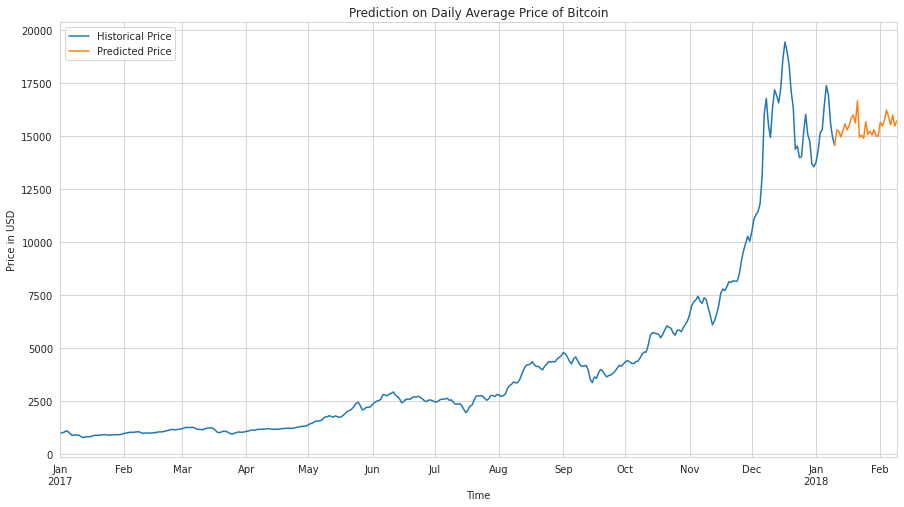

In [135]:
plt.figure(figsize=(15,8))
(bitcoin[:-30]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

In [160]:
#Bitcoin
#Looking at the short-term forcasted trend in next month, the predicted price of Bitcoin is still volatile. 
#Downward trending follows right after an increasing price trend, mainly because of the lacking of momentum. 
#Investors need to be cautious with the drastic price flunctuation.
#Traders are advised to buy a short-term put option and long-term call option.


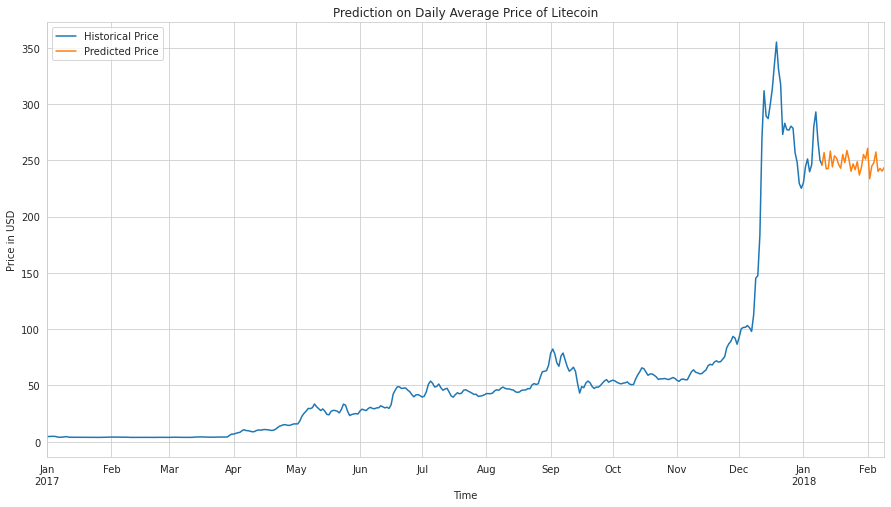

In [136]:
plt.figure(figsize=(15,8))
(litecoin[:-30]['daily_avg']).plot(label='Historical Price')
(litecoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Litecoin')
plt.legend()
plt.show()

In [161]:
#Litcoin
#The predicted price of Litcoin is still volatile. The lack in momentum is obvious in Litcoin's price. In the short term,
 #Litcion holder is advertise to sell the coin in the near future, and traders are advised to buy a short-term put option and long-term call option.

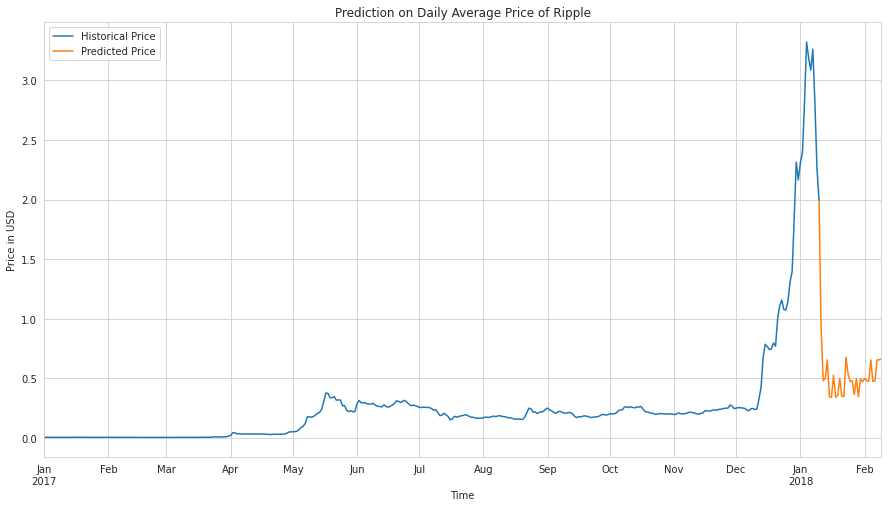

In [137]:
plt.figure(figsize=(15,8))
(ripple[:-30]['daily_avg']).plot(label='Historical Price')
(ripple[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Ripple')
plt.legend()
plt.show()

In [162]:
#Ripple
#The predicted price of Ripple is volitle.
 #Ripple's price is extremely dependent on the market perfotmance, investors are advised to stand on a short position.

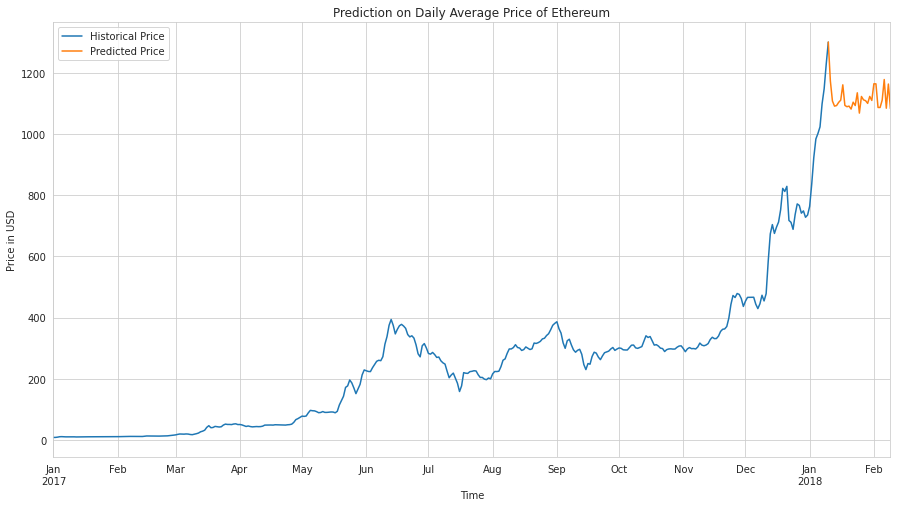

In [138]:
plt.figure(figsize=(15,8))
(ethereum[:-30]['daily_avg']).plot(label='Historical Price')
(ethereum[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Ethereum')
plt.legend()
plt.show()


In [163]:
#Ehereum
#Similar to Bitcoin, the predicted price of Ehereum is volitle. 
#Downward trending follows right after an increasing price trend, mainly because of the lacking of momentum.

#Investors need to be cautious with the drastic price flunctuation as the price has been gone very high. 
#Traders are advised to buy a short-term put option and long-term call option.

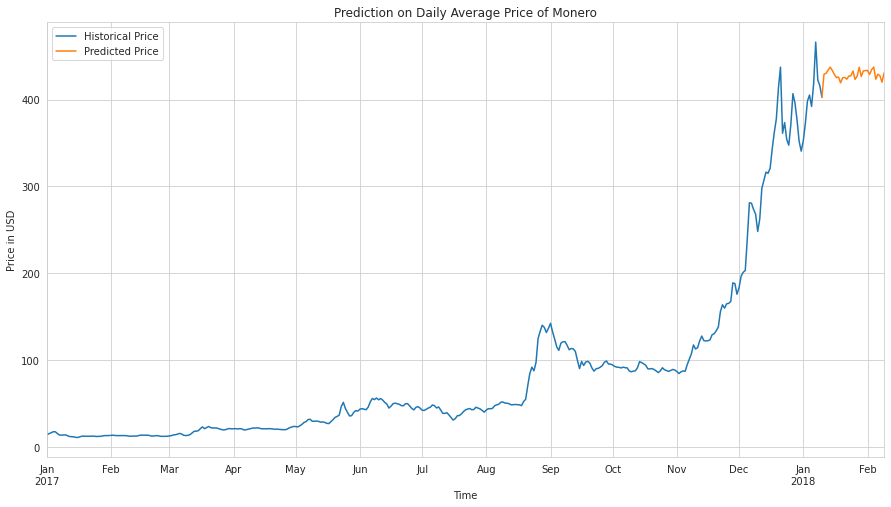

In [139]:
plt.figure(figsize=(15,8))
(monero[:-30]['daily_avg']).plot(label='Historical Price')
(monero[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Monero')
plt.legend()
plt.show()


In [165]:
#Monero
#After a short increase, Monero's price will go into a box area. Monero's good for short-term investment where investors can sell high and buy low
#. To see future trend of the price, 
#investors need to observe sharply whether the price hit the top or botton of the box area, and determine whether the box goes down or high.

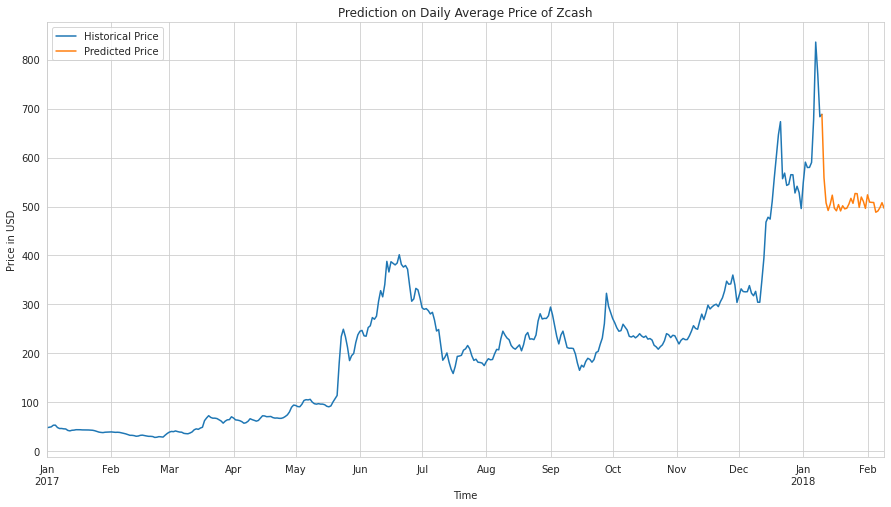

In [140]:
plt.figure(figsize=(15,8))
(zcash[:-30]['daily_avg']).plot(label='Historical Price')
(zcash[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Zcash')
plt.legend()
plt.show()

In [166]:
#Zcash
#Zcash started as an alternative to Bitcoin. However, unlike Bitcoin which utilizes only blockchain technology for transaction,
 #Zcash uses zk-snarks an extra optional encrypted and more secure system to ensure that all the information regarding user transactions is safely encrypted.
  #Zcash boasts of a solid technology and strong privacy features which sets it apart from other cryptocurrencies.

#The price for now is relatively low, we advice investors not to take a short - term operation,
 #rather take a long position, as shown on the prediction that it will enter into a box area at its high price.

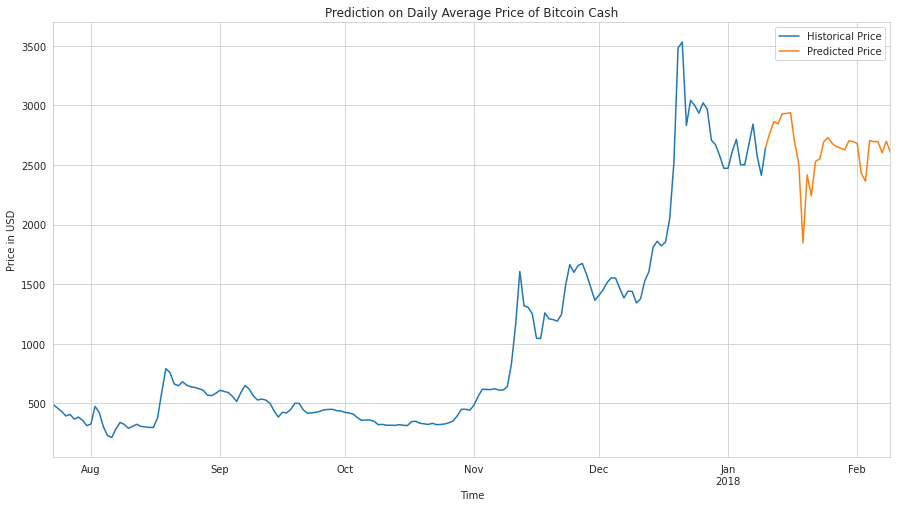

In [141]:
plt.figure(figsize=(15,8))
(bitcoin_cash[:-30]['daily_avg']).plot(label='Historical Price')
(bitcoin_cash[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin Cash')
plt.legend()
plt.show()

In [ ]:
#Bitcoin Cash:
#Bitcoin Cash was started by Bitcoin miners and developers equally concerned with the future of the cryptocurrency,
# and its ability to scale effectively. The jump in December is due to Coinbase announced they will be adding BCH as the forth coin
# they will supporting on the platform. In this sense, Bitcoin Cash is very likely a great “investment” now.

#The future trend is shown as highly volatile. Investors might want to take a long position on BCH and don't trade BCH easily to earn short term wins.